## Random Forest Regression
- 시도1

In [1]:
import pandas as pd 
df = pd.read_csv('../raw_data/df_grouped_rate.csv') #폴더 위치는 상이할 수 있음


In [2]:
y=df.iloc[:,3:4]
# y

In [3]:
X= df.iloc[:,1:].drop(['sales_total'],axis=1)
# X

In [4]:
# 더미변수화
X_dum1 = pd.get_dummies(X.iloc[:,0])  #district는 범주형으로 인식 안해서 따로 실시
X_dum2 = pd.get_dummies(X.iloc[:,1:])
X = pd.concat([X_dum1, X_dum2],axis=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.

Xs_train = X_train
Xs_test = X_test

In [6]:

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=50,max_depth=20, random_state=0,n_jobs=-1)
model=regr.fit(Xs_train, y_train)
y_pred=regr.predict(Xs_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [7]:
import numpy as np
# 정확도 결과값 
print(model.score(Xs_train, y_train))
print(model.score(Xs_test, y_test))
# 오차 결과값

from sklearn import metrics
y_pred = model.predict(Xs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8858033495984206
0.7151252214520722
Mean Absolute Error: 439488728.8260338
Mean Squared Error: 7.688115301889244e+17
Root Mean Squared Error: 876818983.7069705


In [8]:
from sklearn.metrics import r2_score
print("R-Squared score:", r2_score(y_test , y_pred))

R-Squared score: 0.7151252214520722


In [9]:
yy_test=np.array(y_test).reshape(-1,)

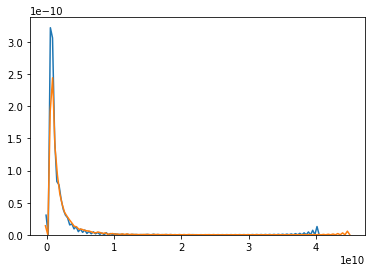

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_pred)
sns.kdeplot(yy_test)
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())
scores
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

0.6440405968049462


array([0.72461305, 0.78218288, 0.80032656, 0.7133037 , 0.19977679])

- 시도2

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.

Xs_train = X_train
Xs_test = X_test

In [13]:

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100,max_depth=20, random_state=0,n_jobs=-1)
model=regr.fit(Xs_train, y_train)
y_pred=regr.predict(Xs_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [14]:
import numpy as np
# 정확도 결과값 
print(model.score(Xs_train, y_train))
print(model.score(Xs_test, y_test))
# 오차 결과값

from sklearn import metrics
y_pred = model.predict(Xs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.888042757538823
0.6840583239471396
Mean Absolute Error: 453233897.6258399
Mean Squared Error: 9.05561715199091e+17
Root Mean Squared Error: 951610064.6793785


In [15]:
from sklearn.metrics import r2_score
print("R-Squared score:", r2_score(y_test , y_pred))

R-Squared score: 0.6840583239471396


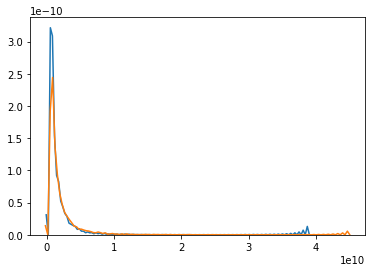

In [17]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_pred)
sns.kdeplot(yy_test)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())
scores
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

0.6496768044200645


array([0.72817725, 0.78707428, 0.80317068, 0.71905445, 0.21090737])